In [1]:

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing


In [2]:
train=pd.read_csv("../input/amazon-employee-access-challenge/train.csv")
test=pd.read_csv("../input/amazon-employee-access-challenge/test.csv")
sample=pd.read_csv("../input/amazon-employee-access-challenge/sampleSubmission.csv")

In [3]:
train.isnull().sum() #nice!!!

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [4]:
sample.isnull().sum()

Id        0
Action    0
dtype: int64

In [5]:
test.isnull().sum()

id                  0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [6]:
train.dtypes

ACTION              int64
RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object

In [7]:
train.duplicated().sum()

0

DATA ANALYSIS******************************

In [8]:
train.columns

Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

In [9]:
train['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

In [10]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


 # *********DATA ANALYSIS***********

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 648x432 with 0 Axes>

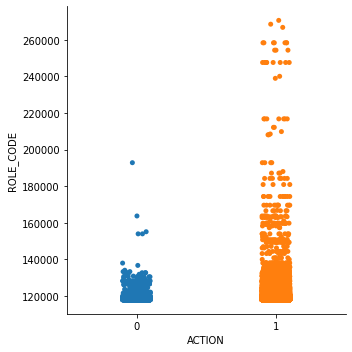

In [11]:
plt.figure(figsize=(9, 6))
sns.catplot('ACTION', 'ROLE_CODE', data=train)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 648x432 with 0 Axes>

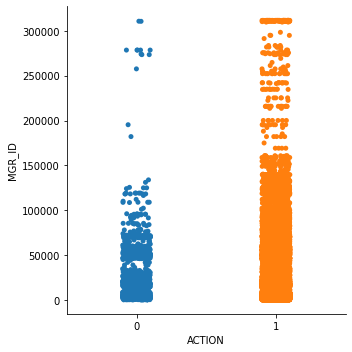

In [12]:
plt.figure(figsize=(9, 6))
sns.catplot('ACTION', 'MGR_ID', data=train)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 648x432 with 0 Axes>

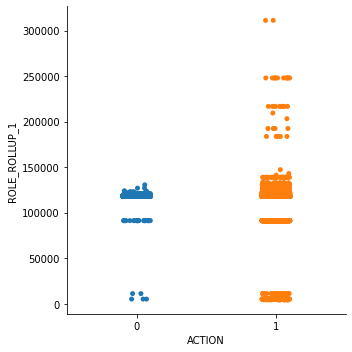

In [13]:
plt.figure(figsize=(9, 6))
sns.catplot('ACTION', 'ROLE_ROLLUP_1', data=train)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 648x432 with 0 Axes>

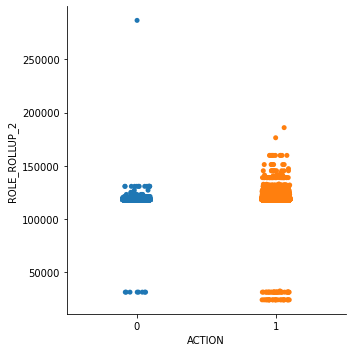

In [14]:
plt.figure(figsize=(9, 6))
sns.catplot('ACTION', 'ROLE_ROLLUP_2', data=train)

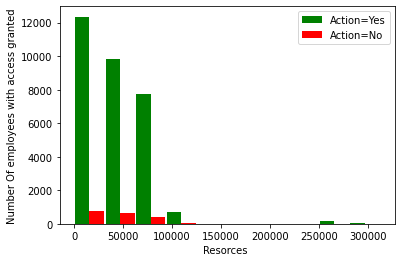

In [15]:
action_no = train[train.ACTION==0].RESOURCE          
action_yes = train[train.ACTION==1].RESOURCE      

plt.xlabel("Resorces ")
plt.ylabel("Number Of employees with access granted")




plt.hist([action_yes, action_no], rwidth=0.95, color=['green','red'],label=['Action=Yes','Action=No'])
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

[Text(0, 0.5, 'Probability')]

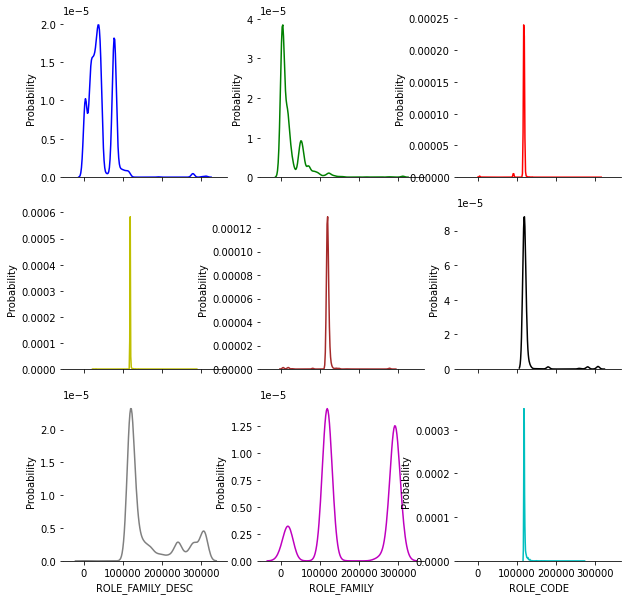

In [16]:
f, axes = plt.subplots(3,3, figsize=(10,10), sharex=True)
sns.despine(left=True)

ax = sns.distplot(train['RESOURCE'], hist=False, color="b", ax=axes[0, 0])
ax.set(ylabel='Probability')
ax = sns.distplot(train['MGR_ID'], hist=False, color="g", ax=axes[0, 1])
ax.set(ylabel='Probability')
ax = sns.distplot(train['ROLE_ROLLUP_1'], hist=False, color="r", ax=axes[0, 2])
ax.set(ylabel='Probability')
ax = sns.distplot(train['ROLE_ROLLUP_2'], hist=False, color="y", ax=axes[1, 0])
ax.set(ylabel='Probability')
ax = sns.distplot(train['ROLE_DEPTNAME'], hist=False, color="brown", ax=axes[1, 1])
ax.set(ylabel='Probability')
ax = sns.distplot(train['ROLE_TITLE'], hist=False, color="k", ax=axes[1, 2])
ax.set(ylabel='Probability')
ax = sns.distplot(train['ROLE_FAMILY_DESC'], hist=False, color="grey", ax=axes[2, 0])
ax.set(ylabel='Probability')
ax = sns.distplot(train['ROLE_FAMILY'], hist=False, color="m", ax=axes[2, 1])
ax.set(ylabel='Probability')
ax = sns.distplot(train['ROLE_CODE'], hist=False, color="c", ax=axes[2, 2])
ax.set(ylabel='Probability')

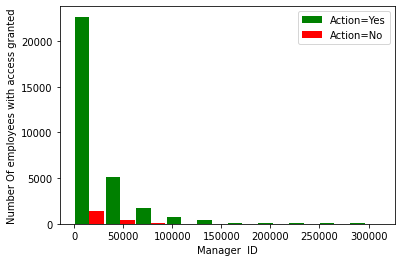

In [17]:
action_no = train[train.ACTION==0].MGR_ID          
action_yes = train[train.ACTION==1].MGR_ID   

plt.xlabel("Manager  ID")
plt.ylabel("Number Of employees with access granted")




plt.hist([action_yes, action_no], rwidth=0.95, color=['green','red'],label=['Action=Yes','Action=No'])
plt.legend()

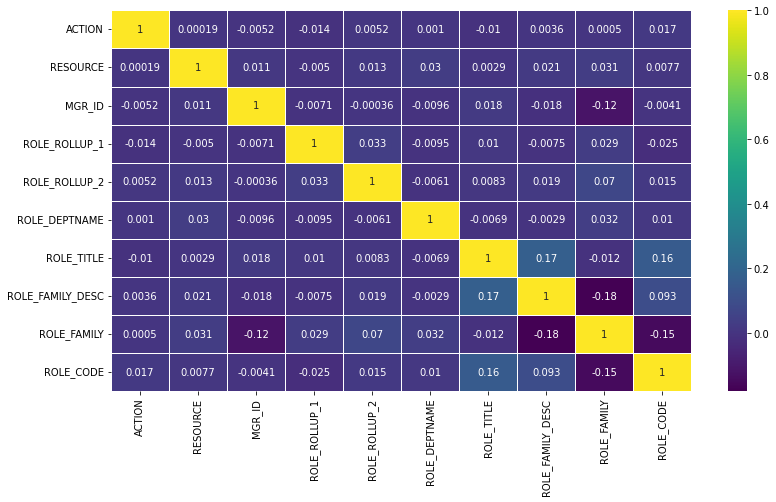

In [18]:
plt.figure(figsize=(13,7))
sns.heatmap(train.corr(),annot=True,cmap='viridis',linewidth=1);

y_train=train
Y_train=y_train.drop(['RESOURCE','MGR_ID','ROLE_ROLLUP_1','ROLE_ROLLUP_2','ROLE_DEPTNAME',"ROLE_TITLE","ROLE_FAMILY_DESC","ROLE_FAMILY","ROLE_CODE"],axis=1)

In [19]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


cols_to_scale = ['RESOURCE','MGR_ID','ROLE_ROLLUP_1','ROLE_ROLLUP_2','ROLE_DEPTNAME',"ROLE_TITLE","ROLE_FAMILY_DESC","ROLE_FAMILY","ROLE_CODE"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[cols_to_scale] = scaler.fit_transform(train[cols_to_scale])

train=pd.get_dummies(data=train,columns=[  'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'])

for col in train:
    print(f'{col}: {train[col].unique()}')

**MODELLING**

In [20]:
y = train['ACTION']
X= train.drop('ACTION', axis=1)
X_test = test.drop('id',axis=1)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1) 

In [22]:
from catboost import CatBoostClassifier, Pool

In [23]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose':200,
          'random_seed':1}
catmodel_1 = CatBoostClassifier(**params)
catmodel_1.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True);

Learning rate set to 0.069882
0:	test: 0.5400959	best: 0.5400959 (0)	total: 60.3ms	remaining: 1m
200:	test: 0.8020842	best: 0.8020842 (200)	total: 1.4s	remaining: 5.55s
400:	test: 0.8237941	best: 0.8237941 (400)	total: 2.75s	remaining: 4.11s
600:	test: 0.8328464	best: 0.8330283 (598)	total: 4.22s	remaining: 2.8s
800:	test: 0.8366271	best: 0.8370599 (785)	total: 5.67s	remaining: 1.41s
999:	test: 0.8417832	best: 0.8417832 (999)	total: 7.02s	remaining: 0us

bestTest = 0.8417831567
bestIteration = 999

CPU times: user 22.3 s, sys: 2.69 s, total: 25 s
Wall time: 7.27 s


In [24]:
categorical_features = list(range(X.shape[1]))
print(categorical_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [25]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': categorical_features,
          'verbose':200,
          'random_seed':1}
catmodel_1 = CatBoostClassifier(**params)
catmodel_1.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True);

Learning rate set to 0.069882
0:	test: 0.5637606	best: 0.5637606 (0)	total: 42.6ms	remaining: 42.5s
200:	test: 0.8955617	best: 0.8955872 (198)	total: 6.91s	remaining: 27.5s
400:	test: 0.8973364	best: 0.8979162 (365)	total: 14.7s	remaining: 22s
600:	test: 0.8972380	best: 0.8979162 (365)	total: 22.4s	remaining: 14.9s
800:	test: 0.8977795	best: 0.8982895 (760)	total: 29.8s	remaining: 7.41s
999:	test: 0.8975697	best: 0.8982895 (760)	total: 37.1s	remaining: 0us

bestTest = 0.8982894616
bestIteration = 760

Shrink model to first 761 iterations.
CPU times: user 2min 14s, sys: 6.15 s, total: 2min 20s
Wall time: 37.4 s


In [26]:
from catboost import cv


params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose':200,
          'random_seed':1}

total_train_data = Pool(data=X,
                        label=y,
                        cat_features = categorical_features)

scores = cv(pool=total_train_data,
            params=params,
            fold_count = 4,
            seed = 1,
            shuffle = True,
            stratified = True)

Training on fold [0/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 17.4ms	remaining: 17.4s
200:	test: 0.8938231	best: 0.8938231 (200)	total: 7.69s	remaining: 30.6s
400:	test: 0.8976765	best: 0.8976765 (400)	total: 17.1s	remaining: 25.5s
600:	test: 0.9011808	best: 0.9011808 (600)	total: 26.3s	remaining: 17.5s
800:	test: 0.9023208	best: 0.9025750 (791)	total: 35.4s	remaining: 8.8s
999:	test: 0.9031134	best: 0.9031268 (997)	total: 44.6s	remaining: 0us

bestTest = 0.9031267986
bestIteration = 997

Training on fold [1/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 12ms	remaining: 12s
200:	test: 0.8835559	best: 0.8840146 (166)	total: 7.84s	remaining: 31.2s
400:	test: 0.8851675	best: 0.8851907 (399)	total: 17.2s	remaining: 25.7s
600:	test: 0.8858301	best: 0.8858757 (597)	total: 26.9s	remaining: 17.9s
800:	test: 0.8858879	best: 0.8861506 (758)	total: 36.3s	remaining: 9.01s
999:	test: 0.8846742	best: 0.8861506 (758)	total: 45.6s	remaining: 0us

bestTest = 0.8861505735
bestIteration = 758

T

In [27]:
feature_imp = catmodel_1.get_feature_importance(prettified=True)
feature_imp

,Feature Id,Importances
0,RESOURCE,18.750628
1,ROLE_DEPTNAME,16.786328
2,MGR_ID,14.595799
3,ROLE_ROLLUP_2,13.202792
4,ROLE_FAMILY_DESC,9.605044
5,ROLE_TITLE,7.989371
6,ROLE_ROLLUP_1,7.334323
7,ROLE_FAMILY,6.434995
8,ROLE_CODE,5.300720


In [28]:
predictions=catmodel_1.predict_proba(X_test)
predictions

array([[0.24015058, 0.75984942],
       [0.01379813, 0.98620187],
       [0.00473392, 0.99526608],
       ...,
       [0.00732233, 0.99267767],
       [0.05389825, 0.94610175],
       [0.0096805 , 0.9903195 ]])

In [29]:
print(catmodel_1.score(X_valid, y_valid)*100)

95.58159404369584


In [30]:
Predictive_Model = pd.DataFrame({
        "Id": test['id'],
        "Action": catmodel_1.predict(X_test)})
Predictive_Model.to_csv('amazon_predict.csv', index=False)